In [1]:
import matplotlib.pyplot as plt

import classes
import utils as pu
import config.init
config.init.run()

from GLOBAL import *

In [20]:
""" Retrieve data. """

#source files
configfile = "config.cfg"
datafile   = "data/UFS_FCKW_2013-2019.csv"
meteofile  = "data/meteodata/meteo_ufs-sfh_2013-2019.csv"

#instantiate dataset
data = classes.Dataset(configfile, datafile, meteofile)

data.read_dataset(cleaned=True)

dataset short info:
	station   = Zugspitze-Schneefernerhaus
	startdate = 2013-04-13 23:37:53
	enddate   = 2019-02-22 04:41:00
	number of measured gases = 52

read_dataset(): Read-in all gases (as def. in config.cfg).



In [29]:
""" Set gaslist and date interval. """

#a list of all possible gaslists can be found in config/config.cfg
data.set_gaslist("old gases")

data.pick_date_interval(start="2013-10-19", end="2018-11-28")

set_gaslist(): Gases changed to 'CFC-11', 'CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-124', 'HCFC-141b', 'HCFC-142b', 'HCFC-22', 'HFC-125', 'HFC-134a', 'HFC-143a', 'HFC-152a', 'H-1211', 'H-1301', 'PFC-116', 'methyl chloride', 'dichloromethane', 'CCl4', 'trichloroethane', 'tetrachloroethylene', 'bromomethane', 'dibromomethane', 'bromoform', 'methyl iodide', 'SF6', 'carbonyl sulfide'.



In [30]:
beta_losses = []#["frobenius", "kullback-leibler", "itakura-saito"]
n_factors = range(8,9)
norm_NMF = False
normed = "_normed" if norm_NMF else ""

In [ ]:
""" Perform NMFs. """
for n in n_factors:
    for bl in beta_losses:
        data.NMF(n_factors=n, solver="mu", beta_loss=bl, normed=norm_NMF)
    data.NMF(n_factors=n, solver="cd", normed=norm_NMF)
    plt.close("all")

In [31]:
""" Read in previously performed NMFs. """
for n in n_factors:
    for bl in beta_losses:
        NMFlabel = data._gaslist + "_mu_bl=%s_%d factors"%(bl,n) + normed
        data.load_NMF(NMFlabel)
    NMFlabel = data._gaslist + "_cd_%d factors"%n + normed
    data.load_NMF(NMFlabel)

plotting NMF factor contributions of old gases_mu_bl=frobenius_4 factors...
plotting NMF factor timeseries of    old gases_mu_bl=frobenius_4 factors...
plotting NMF factor contributions of old gases_mu_bl=kullback-leibler_4 factors...
plotting NMF factor timeseries of    old gases_mu_bl=kullback-leibler_4 factors...


KeyboardInterrupt: 

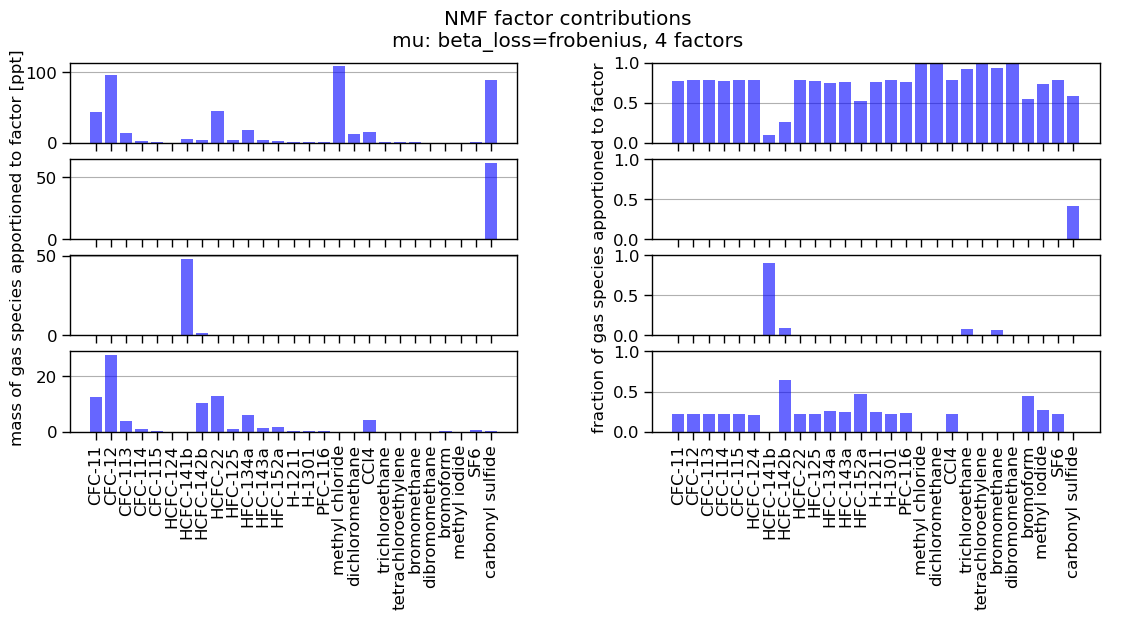

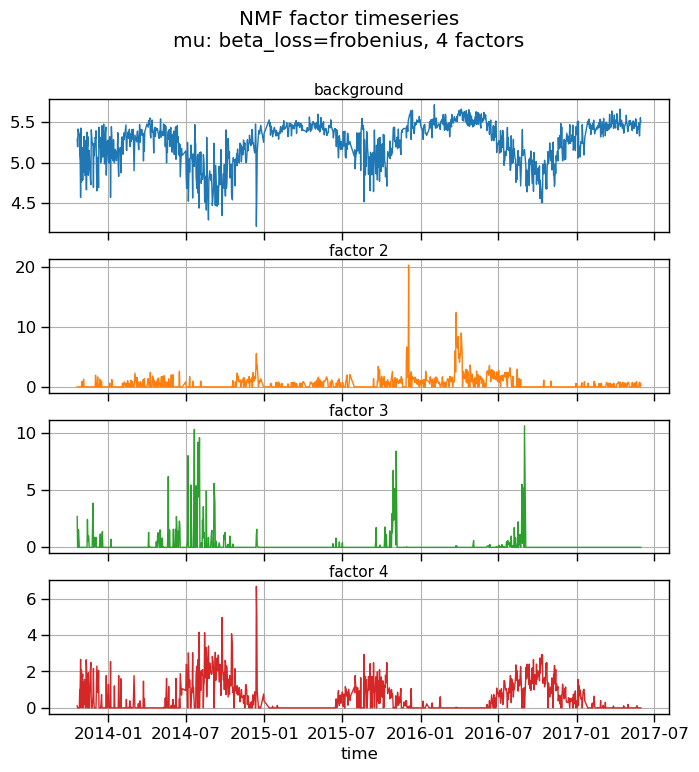

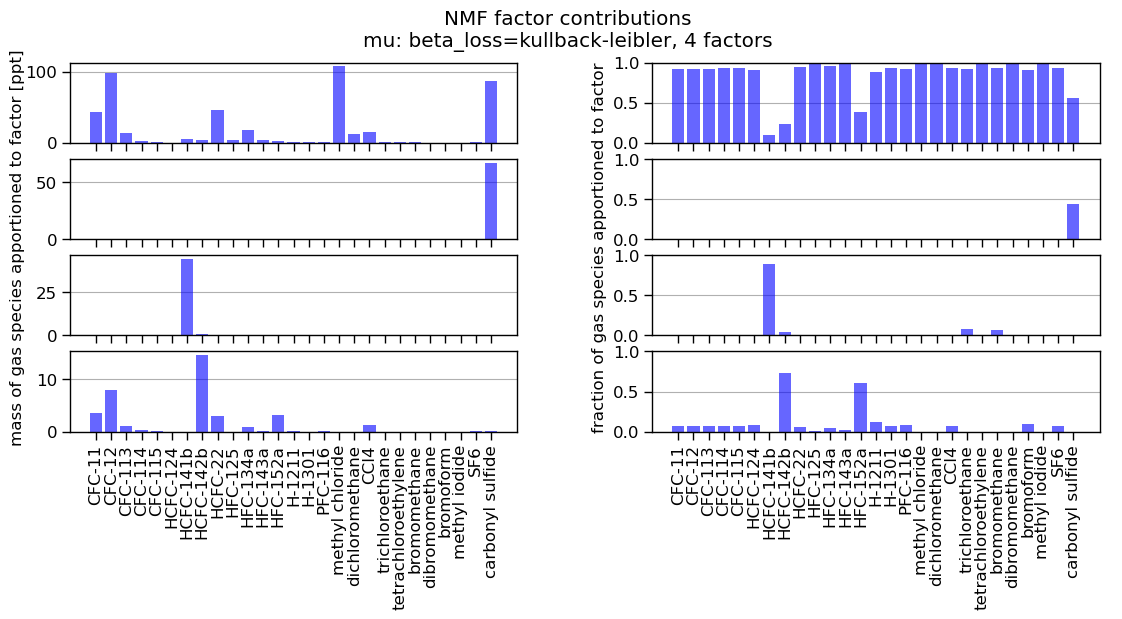

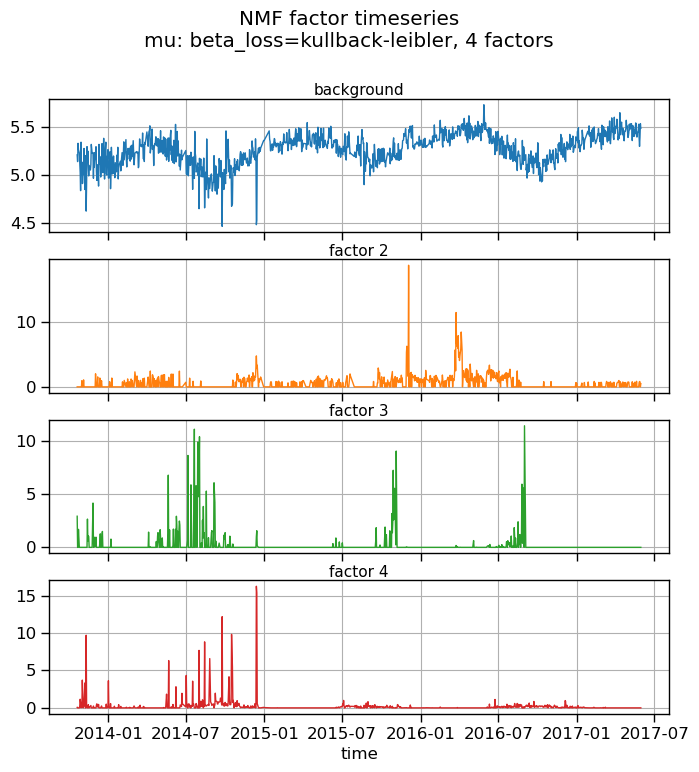

In [19]:
""" Plot/work with (all) previously performed NMFs. """
for n in n_factors:
    for bl in beta_losses:
        NMFlabel = data._gaslist + "_mu_bl=%s_%d factors"%(bl,n) + normed
        NMF = data._NMFs[NMFlabel]
        NMF.plot_factor_contributions(plot="absrel", path=out+"correlations/NMF/", save=save)
        NMF.plot_factor_timeseries(path=out+"correlations/NMF/", save=save)
    NMFlabel = data._gaslist + "_cd_%d factors"%n + normed
    NMF = data._NMFs[NMFlabel]
    NMF.plot_factor_contributions(plot="absrel", path=out+"correlations/NMF/", save=save)
    NMF.plot_factor_timeseries(path=out+"correlations/NMF/", save=save)
    plt.close("all")

In [ ]:
""" Plot Q-values. """
for bl in beta_losses:
    data.plot_NMFs_Qs(n_factors=n_factors, solver="mu", beta_loss=bl, path=out+"correlations/NMF/%s/"%data._gaslist, save=save)
data.plot_NMFs_Qs(n_factors=n_factors, solver="cd", path=out+"correlations/NMF/%s/"%data._gaslist, save=save)

In [ ]:
""" Plot one specific NMF's timeseries. """
n = 8
NMFlabel = "old gases_cd_%d factors"%n + normed
NMF = data._NMFs[NMFlabel]
frame_all = plt.subplots(num="NMF factor timeseries all gases")
pu.purge(out+"correlations/NMF/%s/%s/%s/"%(data._gaslist,data._folder,NMFlabel), "NMF timeseries_factor ", safe_mode=False)
for i in range(1,1+n):
    NMF.plot_one_factor_timeseries(i, frame=frame_all, setup=False, label="auto", alpha=0.5)
    
    frame = plt.subplots()
    NMF.plot_one_factor_timeseries(i, frame=frame)
    pu.fig_ax_setup(frame, xlabel=xlabel, ylabel="a.u.", legend_position=None, 
                    filename=out+"correlations/NMF/%s/%s/%s/"%(data._gaslist,data._folder,NMFlabel)+"NMF timeseries_factor %d (%s)"%(i,NMF._properties["name"].iloc[i-1]))

pu.fig_ax_setup(frame_all, xlabel=xlabel, ylabel="a.u.", 
                legend_position="center left", bbox_to_anchor=(1, 0.5), ncol=1, 
                filename=out+"correlations/NMF/%s/%s/%s/"%(data._gaslist,data._folder,NMFlabel)+"NMF timeseries_all")

In [ ]:
#save dataset
data.save_dataset()